<a href="https://colab.research.google.com/github/JColeman1550/BASEBALL.github.io/blob/main/2022_TDIR_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# import packages
%%capture
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [73]:
catcher_all = pd.read_csv('/content/drive/MyDrive/2022 catcher_throwing .csv')

In [74]:
catcher_all.head()

,player_id,player_name,team_name,start_year,end_year,sb_attempts,catcher_stealing_runs,caught_stealing_above_average,n_cs,rate_cs,...,pop_time_percentile_rank,exchange_time,exchange_time_percentile_rank,arm_strength,n_xcs_with_flight_over_xcs,n_xcs_with_exchange_over_xcs,n_xcs_with_accuracy_over_xcs,n_xcs_with_ground_other_over_xcs,n_xcs_with_onfly_other_over_xcs,n_xcs_with_untracked_other_over_xcs
0,592663,"Realmuto, J.T.",PHI,2022,2022,46,9.343040,14.373907,25,0.543478,...,1.00,0.66,0.93,84.225284,6.749065,6.188228,-1.255653,1.100857,1.591410,0.000000
1,542194,"Bethancourt, Christian",TB,2022,2022,18,2.816328,4.332812,8,0.444444,...,0.98,0.74,0.41,85.563626,2.650953,-0.193548,1.781209,0.000000,0.094198,0.000000
2,595751,"Alfaro, Jorge",SD,2022,2022,20,-0.049734,-0.076514,3,0.150000,...,0.97,0.74,0.44,85.464149,1.454837,-0.002714,-1.029005,-0.155452,-0.332985,-0.011196
3,669221,"Murphy, Sean",OAK,2022,2022,37,0.402232,0.618818,9,0.243243,...,0.95,0.69,0.78,83.449918,3.268592,1.867679,-0.716267,-0.915161,-3.643096,0.757072
4,596117,"Stubbs, Garrett",PHI,2022,2022,19,1.230552,1.893157,6,0.315789,...,0.93,0.70,0.75,81.247247,1.085612,1.187185,-1.592026,1.521255,-0.308869,0.000000


In [75]:
features = ["sb_attempts", "catcher_stealing_runs", "n_cs", "rate_cs", "est_cs_pct", "cs_aa_per_throw", "seasonal_runner_speed", "runner_distance_from_second", "pop_time_percentile_rank", "exchange_time_percentile_rank", "arm_strength", "n_xcs_with_flight_over_xcs", "n_xcs_with_exchange_over_xcs", "n_xcs_with_accuracy_over_xcs", "n_xcs_with_ground_other_over_xcs", "n_xcs_with_onfly_other_over_xcs", "n_xcs_with_untracked_other_over_xcs"]
target = "caught_stealing_above_average"

In [76]:
X_train, X_test, y_train, y_test = train_test_split(catcher_all[features], catcher_all[target], test_size=0.2, random_state=42)

In [77]:
model = RandomForestRegressor(random_state=42)

In [78]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
importance_scores = model.feature_importances_

In [80]:
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importance_scores})

In [81]:
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

In [82]:
print(feature_importance_df)

                                Feature  Importance
1                 catcher_stealing_runs    0.542712
5                       cs_aa_per_throw    0.401098
3                               rate_cs    0.027224
15      n_xcs_with_onfly_other_over_xcs    0.004671
4                            est_cs_pct    0.003964
14     n_xcs_with_ground_other_over_xcs    0.003079
13         n_xcs_with_accuracy_over_xcs    0.002772
11           n_xcs_with_flight_over_xcs    0.002466
8              pop_time_percentile_rank    0.002457
10                         arm_strength    0.002018
7           runner_distance_from_second    0.001743
12         n_xcs_with_exchange_over_xcs    0.001655
0                           sb_attempts    0.000974
16  n_xcs_with_untracked_other_over_xcs    0.000940
9         exchange_time_percentile_rank    0.000805
6                 seasonal_runner_speed    0.000763
2                                  n_cs    0.000658


In [83]:
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print the regression metrics
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 10.272438205130559
R-squared: 0.5480643758420165


In [85]:
import matplotlib.pyplot as plt

In [86]:
# importance_scores with the variable containing the importance scores from model
importance_scores = [0.542712, 0.401098, 0.027224, 0.004671, 0.003964, 0.003079, 0.002772, 0.002466,0.002457,0.002018,0.001743,0.001655,0.000974,0.000940,0.000805,0.000763,0.000658]

# features with the list of features used in the model
features = ["catcher_stealing_runs", "cs_aa_per_throw", "rate_cs","n_xcs_with_onfly_other_over_xcs","est_cs_pct", "n_xcs_with_ground_other_over_xcs","n_xcs_with_accuracy_over_xcs","n_xcs_with_flight_over_xcs","pop_time_percentile_rank","arm_strength", "runner_distance_from_second","n_xcs_with_exchange_over_xcs", "sb_attempts","n_xcs_with_untracked_other_over_xcs","exchange_time_percentile_rank","seasonal_runner_speed","n_cs"]

# Create the DataFrame
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importance_scores})

# Sort the DataFrame by Importance in descending order to get the ranking
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)


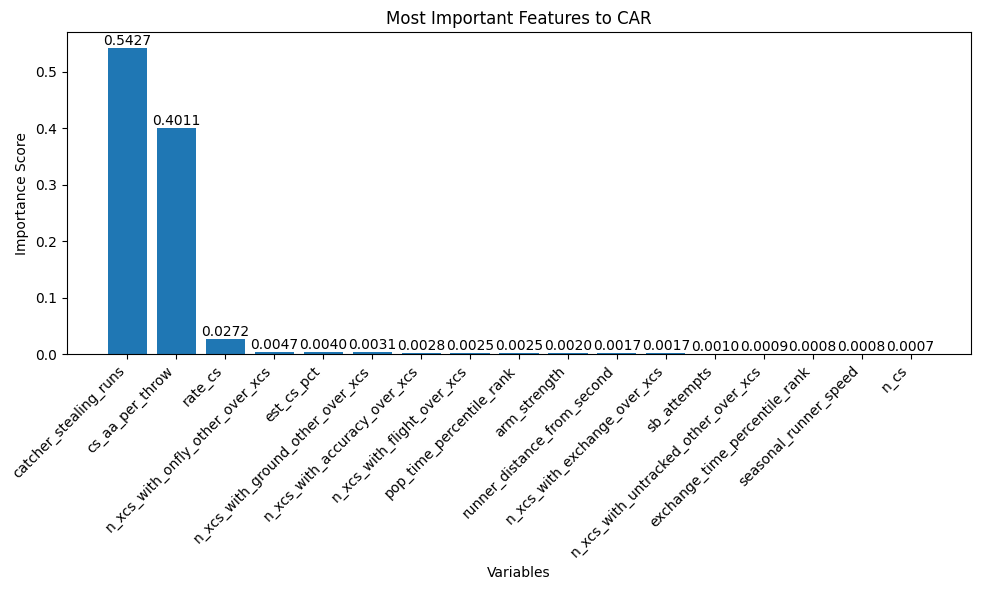

In [87]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Variables')
plt.ylabel('Importance Score')
plt.title('Most Important Features to CAR')
plt.xticks(rotation=45, ha='right')  # Rotates x-axis labels for better readability

# Add the importance values as text over the bars
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [88]:
# Find the minimum and maximum values for each variable
min_catcher_stealing_runs = catcher_all['catcher_stealing_runs'].min()
max_catcher_stealing_runs = catcher_all['catcher_stealing_runs'].max()

min_cs_aa_per_throw = catcher_all['cs_aa_per_throw'].min()
max_cs_aa_per_throw = catcher_all['cs_aa_per_throw'].max()

min_rate_cs = catcher_all['rate_cs'].min()
max_rate_cs = catcher_all['rate_cs'].max()

min_n_xcs_with_onfly_other_over_xcs = catcher_all['n_xcs_with_onfly_other_over_xcs'].min()
max_n_xcs_with_onfly_other_over_xcs = catcher_all['n_xcs_with_onfly_other_over_xcs'].max()

min_est_cs_pct  = catcher_all['est_cs_pct'].min()
max_est_cs_pct  = catcher_all['est_cs_pct'].max()

min_n_xcs_with_ground_other_over_xcs  = catcher_all['n_xcs_with_ground_other_over_xcs'].min()
max_n_xcs_with_ground_other_over_xcs  = catcher_all['n_xcs_with_ground_other_over_xcs'].max()

min_n_xcs_with_accuracy_over_xcs  = catcher_all['n_xcs_with_accuracy_over_xcs'].min()
max_n_xcs_with_accuracy_over_xcs  = catcher_all['n_xcs_with_accuracy_over_xcs'].max()

min_n_xcs_with_flight_over_xcs   = catcher_all['n_xcs_with_flight_over_xcs'].min()
max_n_xcs_with_flight_over_xcs   = catcher_all['n_xcs_with_flight_over_xcs'].max()

# Print the minimum and maximum values
print("Minimum catcher_stealing_runs:", min_catcher_stealing_runs)
print("Maximum catcher_stealing_runs:", max_catcher_stealing_runs)

print("Minimum cs_aa_per_throw:", min_cs_aa_per_throw)
print("Maximum cs_aa_per_throw:", max_cs_aa_per_throw)

print("Minimum rate_cs:", min_rate_cs)
print("Maximum rate_cs:", max_rate_cs)

print("Minimum n_xcs_with_onfly_other_over_xcs:", min_n_xcs_with_onfly_other_over_xcs)
print("Maximum n_xcs_with_onfly_other_over_xcs:", max_n_xcs_with_onfly_other_over_xcs)

print("Minimum est_cs_pct:", max_est_cs_pct)
print("Maximum est_cs_pct:", min_est_cs_pct)

print("Minimum n_xcs_with_ground_other_over_xcs:", min_n_xcs_with_ground_other_over_xcs)
print("Maximum n_xcs_with_ground_other_over_xcs:", max_n_xcs_with_ground_other_over_xcs)

print("Minimum n_xcs_with_accuracy_over_xcs:", min_n_xcs_with_accuracy_over_xcs)
print("Maximum n_xcs_with_accuracy_over_xcs:", max_n_xcs_with_accuracy_over_xcs)

print("Minimum n_xcs_with_flight_over_xcs:", min_n_xcs_with_flight_over_xcs)
print("Maximum n_xcs_with_flight_over_xcs:", max_n_xcs_with_flight_over_xcs)

Minimum catcher_stealing_runs: -4.196790375
Maximum catcher_stealing_runs: 9.34303956
Minimum cs_aa_per_throw: -0.226884381
Maximum cs_aa_per_throw: 0.312476239
Minimum rate_cs: 0.041666667
Maximum rate_cs: 0.543478261
Minimum n_xcs_with_onfly_other_over_xcs: -4.399191
Maximum n_xcs_with_onfly_other_over_xcs: 2.428313879
Minimum est_cs_pct: 0.366799959
Maximum est_cs_pct: 0.153825707
Minimum n_xcs_with_ground_other_over_xcs: -0.954927784
Maximum n_xcs_with_ground_other_over_xcs: 1.935963428
Minimum n_xcs_with_accuracy_over_xcs: -2.802301672
Maximum n_xcs_with_accuracy_over_xcs: 2.71353211
Minimum n_xcs_with_flight_over_xcs: -5.038184396
Maximum n_xcs_with_flight_over_xcs: 6.749065472


In [89]:
# Normalize the variables
normalized_catcher_stealing_runs = (catcher_all['catcher_stealing_runs'] - min_catcher_stealing_runs) / (max_catcher_stealing_runs - min_catcher_stealing_runs)

normalized_cs_aa_per_throw = (catcher_all['cs_aa_per_throw'] - min_cs_aa_per_throw) / (max_cs_aa_per_throw - min_cs_aa_per_throw)

normalized_rate_cs = (catcher_all['rate_cs'] - min_rate_cs) / (max_rate_cs - min_rate_cs)

normalized_n_xcs_with_onfly_other_over_xcs = (catcher_all['n_xcs_with_onfly_other_over_xcs'] - min_n_xcs_with_onfly_other_over_xcs) / (max_n_xcs_with_onfly_other_over_xcs - min_n_xcs_with_onfly_other_over_xcs)

normalized_est_cs_pct = (catcher_all['est_cs_pct'] - min_est_cs_pct) / (max_est_cs_pct - min_est_cs_pct)

normalized_n_xcs_with_ground_other_over_xcs = (catcher_all['n_xcs_with_ground_other_over_xcs'] - min_n_xcs_with_ground_other_over_xcs) / (max_n_xcs_with_ground_other_over_xcs - min_n_xcs_with_ground_other_over_xcs)

normalized_n_xcs_with_accuracy_over_xcs = (catcher_all['n_xcs_with_accuracy_over_xcs'] - min_n_xcs_with_accuracy_over_xcs) / (max_n_xcs_with_accuracy_over_xcs - min_n_xcs_with_accuracy_over_xcs)

normalized_n_xcs_with_flight_over_xcs = (catcher_all['n_xcs_with_flight_over_xcs'] - min_n_xcs_with_flight_over_xcs) / (max_n_xcs_with_flight_over_xcs - min_n_xcs_with_flight_over_xcs)

# Display the normalized values
catcher_all['normalized_catcher_stealing_runs'] = normalized_catcher_stealing_runs

catcher_all['normalized_cs_aa_per_throw'] = normalized_cs_aa_per_throw

catcher_all['normalized_rate_cs'] = normalized_rate_cs

catcher_all['normalized_n_xcs_with_onfly_other_over_xcs'] = normalized_n_xcs_with_onfly_other_over_xcs

catcher_all['normalized_est_cs_pct'] = normalized_est_cs_pct

catcher_all['normalized_n_xcs_with_ground_other_over_xcs'] = normalized_n_xcs_with_ground_other_over_xcs

catcher_all['normalized_n_xcs_with_accuracy_over_xcs'] = normalized_n_xcs_with_accuracy_over_xcs

catcher_all['normalized_n_xcs_with_flight_over_xcs'] = normalized_n_xcs_with_flight_over_xcs

print(catcher_all[['player_name', 'normalized_catcher_stealing_runs', 'normalized_cs_aa_per_throw', 'normalized_rate_cs', 'normalized_n_xcs_with_onfly_other_over_xcs', 'normalized_est_cs_pct', 'normalized_n_xcs_with_ground_other_over_xcs', 'normalized_n_xcs_with_accuracy_over_xcs', 'normalized_n_xcs_with_flight_over_xcs']])





               player_name  normalized_catcher_stealing_runs  \
0           Realmuto, J.T.                          1.000000   
1   Bethancourt, Christian                          0.517962   
2            Alfaro, Jorge                          0.306286   
3             Murphy, Sean                          0.339666   
4          Stubbs, Garrett                          0.400843   
5        Maldonado, Martin                          0.537513   
6       Contreras, Willson                          0.451908   
7         Rutschman, Adley                          0.419608   
8              Smith, Will                          0.149168   
9            Sanchez, Gary                          0.411300   
10            Fortes, Nick                          0.392858   
11      Vazquez, Christian                          0.259012   
12         Heineman, Tyler                          0.447143   
13       Stephenson, Tyler                          0.324621   
14             Diaz, Elias              

In [90]:
# Define weights for each variable
weight_catcher_stealing_runs = 0.542712
weight_cs_aa_per_throw = 0.401098
weight_rate_cs = 0.027224
weight_n_xcs_with_onfly_other_over_xcs = 0.004671
weight_est_cs_pct = 0.003964
weight_n_xcs_with_ground_other_over_xcs = 0.003079
weight_n_xcs_with_accuracy_over_xcs = 0.002772
weight_n_xcs_with_flight_over_xcs = 0.002466

# Normalize the weights to add up to 1.0
total_weight_sum = (
    weight_catcher_stealing_runs +
    weight_cs_aa_per_throw +
    weight_rate_cs +
    weight_n_xcs_with_onfly_other_over_xcs +
    weight_est_cs_pct +
    weight_n_xcs_with_ground_other_over_xcs +
    weight_n_xcs_with_accuracy_over_xcs +
    weight_n_xcs_with_flight_over_xcs
)

weight_catcher_stealing_runs /= total_weight_sum
weight_cs_aa_per_throw /= total_weight_sum
weight_rate_cs /= total_weight_sum
weight_n_xcs_with_onfly_other_over_xcs /= total_weight_sum
weight_est_cs_pct /= total_weight_sum
weight_n_xcs_with_ground_other_over_xcs /= total_weight_sum
weight_n_xcs_with_accuracy_over_xcs /= total_weight_sum
weight_n_xcs_with_flight_over_xcs /= total_weight_sum

# Display the normalized weights
print("Normalized Weights:")
print("catcher_stealing_runs:", weight_catcher_stealing_runs)
print("cs_aa_per_throw:", weight_cs_aa_per_throw)
print("rate_cs:", weight_rate_cs)
print("n_xcs_with_onfly_other_over_xcs:", weight_n_xcs_with_onfly_other_over_xcs)
print("est_cs_pct:", weight_est_cs_pct)
print("n_xcs_with_ground_other_over_xcs:", weight_n_xcs_with_ground_other_over_xcs)
print("n_xcs_with_accuracy_over_xcs:", weight_n_xcs_with_accuracy_over_xcs)
print("n_xcs_with_flight_over_xcs:", weight_n_xcs_with_flight_over_xcs)


Normalized Weights:
catcher_stealing_runs: 0.5493114274898632
cs_aa_per_throw: 0.40597538831521907
rate_cs: 0.02755504632656738
n_xcs_with_onfly_other_over_xcs: 0.004727799786636652
est_cs_pct: 0.0040122026020611625
n_xcs_with_ground_other_over_xcs: 0.0031164409212276287
n_xcs_with_accuracy_over_xcs: 0.0028057077731870697
n_xcs_with_flight_over_xcs: 0.0024959867852378474


In [91]:
normalized_catcher_stealing_runs = catcher_all['normalized_catcher_stealing_runs']
normalized_cs_aa_per_throw = catcher_all['normalized_cs_aa_per_throw']
normalized_rate_cs = catcher_all['normalized_rate_cs']
normalized_n_xcs_with_onfly_other_over_xcs = catcher_all['normalized_n_xcs_with_onfly_other_over_xcs']
normalized_est_cs_pct = catcher_all['normalized_est_cs_pct']
normalized_n_xcs_with_ground_other_over_xcs = catcher_all['normalized_n_xcs_with_ground_other_over_xcs']
normalized_n_xcs_with_accuracy_over_xcs = catcher_all['normalized_n_xcs_with_accuracy_over_xcs']
normalized_n_xcs_with_flight_over_xcs = catcher_all['normalized_n_xcs_with_flight_over_xcs']



In [92]:
CAR =(0.543 * normalized_catcher_stealing_runs)+ (0.401 * normalized_cs_aa_per_throw) +(0.027 * normalized_rate_cs) +(0.005 * normalized_n_xcs_with_onfly_other_over_xcs) +(0.004 * normalized_est_cs_pct) +(0.003 * normalized_n_xcs_with_ground_other_over_xcs) +(0.003 * normalized_n_xcs_with_accuracy_over_xcs) +(0.002 * normalized_n_xcs_with_flight_over_xcs)

In [93]:
catcher_all['CAR'] = (
    weight_catcher_stealing_runs * catcher_all['normalized_catcher_stealing_runs'] +
    weight_cs_aa_per_throw * catcher_all['normalized_cs_aa_per_throw'] +
    weight_rate_cs * catcher_all['normalized_rate_cs'] +
    weight_n_xcs_with_onfly_other_over_xcs * catcher_all['normalized_n_xcs_with_onfly_other_over_xcs'] +
    weight_est_cs_pct * catcher_all['normalized_est_cs_pct'] +
    weight_n_xcs_with_ground_other_over_xcs * catcher_all['normalized_n_xcs_with_ground_other_over_xcs'] +
    weight_n_xcs_with_accuracy_over_xcs * catcher_all['normalized_n_xcs_with_accuracy_over_xcs'] +
    weight_n_xcs_with_flight_over_xcs * catcher_all['normalized_n_xcs_with_flight_over_xcs']
)

In [94]:
CAR_scores = catcher_all['CAR']

# Check if there are any missing or NaN values in the 'TDIR_scores'
if CAR_scores.isnull().any():
    raise ValueError("CAR scores contain missing or NaN values")

# Calculate the average TDIR score
average_CAR = CAR_scores.mean()

print("Average CAR:", average_CAR)

Average CAR: 0.35971324164898244


In [95]:
print(catcher_all[['player_name', 'CAR']])

               player_name       CAR
0           Realmuto, J.T.  0.993943
1   Bethancourt, Christian  0.667639
2            Alfaro, Jorge  0.348045
3             Murphy, Sean  0.385771
4          Stubbs, Garrett  0.489602
5        Maldonado, Martin  0.571442
6       Contreras, Willson  0.541290
7         Rutschman, Adley  0.506048
8              Smith, Will  0.196547
9            Sanchez, Gary  0.462485
10            Fortes, Nick  0.465940
11      Vazquez, Christian  0.312583
12         Heineman, Tyler  0.518580
13       Stephenson, Tyler  0.380684
14             Diaz, Elias  0.399782
15             Haase, Eric  0.452533
16             Maile, Luke  0.366547
17        Higashioka, Kyle  0.553876
18            Adams, Riley  0.281292
19         Mejia Francisco  0.449303
20             Nido, Tomas  0.437798
21            Melendez, MJ  0.478037
22          McGuire, Reese  0.482021
23              Gomes, Yan  0.542095
24      Contreras, William  0.143547
25           Jansen, Danny  0.421735
2

In [96]:
block_all = pd.read_csv('/content/drive/MyDrive/TDIR/2022 catcher_blocking .csv')

In [97]:
features = ["pitches", "n_pbwp", "x_pbwp", "freq_pbwp_easy", "freq_pbwp_medium", "freq_pbwp_tough", "diff_pbwp_easy", "diff_pbwp_medium", "diff_pbwp_tough"]
target = "blocks_above_average"

In [98]:
X_train, X_test, y_train, y_test = train_test_split(block_all[features], block_all[target], test_size=0.2, random_state=42)

In [99]:
model = RandomForestRegressor(random_state=42)

In [100]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [101]:
importance_scores = model.feature_importances_

In [102]:
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importance_scores})

In [103]:
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

In [104]:
print(feature_importance_df)

            Feature  Importance
6    diff_pbwp_easy    0.569345
7  diff_pbwp_medium    0.234765
2            x_pbwp    0.066677
8   diff_pbwp_tough    0.054000
5   freq_pbwp_tough    0.022312
4  freq_pbwp_medium    0.018361
3    freq_pbwp_easy    0.012603
0           pitches    0.012202
1            n_pbwp    0.009735


In [105]:
y_pred = model.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print the regression metrics
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 32.64475
R-squared: 0.6828250136320825


In [107]:
import matplotlib.pyplot as plt

In [108]:
# importance_scores with the variable containing the importance scores from model
importance_scores = [0.569345, 0.234765, 0.066677, 0.054000, 0.022312, 0.018361, 0.012603, 0.012202,0.009735]

# list of features used in the model
features = ["diff_pbwp_easy", " diff_pbwp_medium","x_pbwp", "diff_pbwp_tough", "freq_pbwp_tough","freq_pbwp_medium","n_pbwp","pitches","freq_pbwp_easy"]

# Create the DataFrame
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importance_scores})

# Sort the DataFrame by Importance in descending order to get the ranking
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

In [109]:
# Find the minimum and maximum values for each variable
min_diff_pbwp_easy = block_all['diff_pbwp_easy'].min()
max_diff_pbwp_easy = block_all['diff_pbwp_easy'].max()

min_diff_pbwp_medium = block_all['diff_pbwp_medium'].min()
max_diff_pbwp_medium = block_all['diff_pbwp_medium'].max()

min_x_pbwp = block_all['x_pbwp'].min()
max_x_pbwp = block_all['x_pbwp'].max()

min_diff_pbwp_tough = block_all['diff_pbwp_tough'].min()
max_diff_pbwp_tough = block_all['diff_pbwp_tough'].max()

min_freq_pbwp_tough  = block_all['freq_pbwp_tough'].min()
max_freq_pbwp_tough  = block_all['freq_pbwp_tough'].max()

min_freq_pbwp_medium  = block_all['freq_pbwp_medium'].min()
max_freq_pbwp_medium  = block_all['freq_pbwp_medium'].max()

min_freq_pbwp_easy  = block_all['freq_pbwp_easy'].min()
max_freq_pbwp_easy  = block_all['freq_pbwp_easy'].max()

min_pitches = block_all['pitches'].min()
max_pitches = block_all['pitches'].max()

min_n_pbwp = block_all['n_pbwp'].min()
max_n_pbwp = block_all['n_pbwp'].max()

# Print the minimum and maximum values
print("Minimum diff_pbwp_easy:", min_diff_pbwp_easy)
print("Maximum diff_pbwp_easy:", max_diff_pbwp_easy)

print("Minimum diff_pbwp_medium:", min_diff_pbwp_medium)
print("Maximum diff_pbwp_medium:", max_diff_pbwp_medium)

print("Minimum x_pbwp:", min_x_pbwp)
print("Maximum x_pbwp:", max_x_pbwp)

print("Minimum  diff_pbwp_tough :", min_diff_pbwp_tough )
print("Maximum  diff_pbwp_tough :", max_diff_pbwp_tough )

print("Minimum freq_pbwp_tough:", max_freq_pbwp_tough)
print("Maximum freq_pbwp_tough:", min_freq_pbwp_tough)

print("Minimum freq_pbwp_medium:", min_freq_pbwp_medium)
print("Maximum freq_pbwp_medium:", max_freq_pbwp_medium)

print("Minimum freq_pbwp_easy:", min_freq_pbwp_easy)
print("Maximum freq_pbwp_easy:", max_freq_pbwp_easy)

print("Minimum pitches:", min_pitches)
print("Maximum pitches:", max_pitches)

print("Minimum n_pbwp:", min_n_pbwp)
print("Maximum n_pbwp:", max_n_pbwp)

Minimum diff_pbwp_easy: -10.03631816
Maximum diff_pbwp_easy: 10.77733156
Minimum diff_pbwp_medium: -15.43266491
Maximum diff_pbwp_medium: 8.038219804
Minimum x_pbwp: 8.541459012
Maximum x_pbwp: 50.83412572
Minimum  diff_pbwp_tough : -6.212052254
Maximum  diff_pbwp_tough : 4.622812912
Minimum freq_pbwp_tough: 0.019160584
Maximum freq_pbwp_tough: 0.005559968
Minimum freq_pbwp_medium: 0.022905759
Maximum freq_pbwp_medium: 0.05099278
Minimum freq_pbwp_easy: 0.932177616
Maximum freq_pbwp_easy: 0.969023034
Minimum pitches: 1015
Maximum pitches: 5121
Minimum n_pbwp: 9
Maximum n_pbwp: 54


In [110]:
# Normalize the variables
normalized_diff_pbwp_easy = (block_all['diff_pbwp_easy'] - min_diff_pbwp_easy) / (max_diff_pbwp_easy - min_diff_pbwp_easy)

normalized_diff_pbwp_medium = (block_all['diff_pbwp_medium'] - min_diff_pbwp_medium) / (max_diff_pbwp_medium - min_diff_pbwp_medium)

normalized_x_pbwp = (block_all['x_pbwp'] - min_x_pbwp) / (max_x_pbwp - min_x_pbwp)

normalized_diff_pbwp_tough = (block_all['diff_pbwp_tough'] - min_diff_pbwp_tough) / (max_diff_pbwp_tough - min_diff_pbwp_tough)

normalized_freq_pbwp_tough = (block_all['freq_pbwp_tough'] - min_freq_pbwp_tough) / (max_freq_pbwp_tough - min_freq_pbwp_tough)

normalized_freq_pbwp_medium = (block_all['freq_pbwp_medium'] - min_freq_pbwp_medium) / (max_freq_pbwp_medium - min_freq_pbwp_medium)

normalized_freq_pbwp_easy = (block_all['freq_pbwp_easy'] - min_freq_pbwp_easy) / (max_freq_pbwp_easy - min_freq_pbwp_easy)

normalized_pitches = (block_all['pitches'] - min_pitches) / (max_pitches - min_pitches)

normalized_n_pbwp = (block_all['n_pbwp'] - min_n_pbwp) / (max_n_pbwp - min_n_pbwp)

# Display the normalized values
block_all['diff_pbwp_easy'] = normalized_diff_pbwp_easy

block_all['diff_pbwp_medium'] = normalized_diff_pbwp_medium

block_all['x_pbwp'] = normalized_x_pbwp

block_all['diff_pbwp_tough'] = normalized_diff_pbwp_tough

block_all['freq_pbwp_tough'] = normalized_freq_pbwp_tough

block_all['normalized_freq_pbwp_medium'] = normalized_freq_pbwp_medium

block_all['normalized_freq_pbwp_easy'] = normalized_freq_pbwp_easy

block_all['pitches'] = normalized_pitches

block_all['n_pbwp'] = normalized_n_pbwp

print(block_all[['diff_pbwp_easy', 'diff_pbwp_medium', 'x_pbwp','diff_pbwp_tough', 'freq_pbwp_tough', 'normalized_freq_pbwp_medium', 'normalized_freq_pbwp_easy', 'pitches', 'n_pbwp']])

    diff_pbwp_easy  diff_pbwp_medium    x_pbwp  diff_pbwp_tough  \
0         0.818401          0.915244  0.806946         1.000000   
1         0.837441          0.898864  0.711897         0.720190   
2         0.977111          0.906081  1.000000         0.361002   
3         0.766653          0.777238  0.359316         0.850922   
4         1.000000          0.676257  0.880628         0.625814   
..             ...               ...       ...              ...   
61        0.455895          0.431732  0.001557         0.338389   
62        0.312442          0.544121  0.429656         0.287935   
63        0.000000          0.788570  0.453786         0.175904   
64        0.220602          0.413350  0.376180         0.538903   
65        0.019259          0.000000  0.486181         0.589167   

    freq_pbwp_tough  normalized_freq_pbwp_medium  normalized_freq_pbwp_easy  \
0          1.000000                     0.917009                   0.000000   
1          0.568829                  

In [111]:
# Importance scores from the importance model
importance_scores = {
    "diff_pbwp_easy": 0.569345,
    "diff_pbwp_medium": 0.234765,
    "x_pbwp": 0.066677,
    "diff_pbwp_tough": 0.054000,
    "freq_pbwp_tough": 0.022312,
    "freq_pbwp_medium": 0.018361,
    "freq_pbwp_easy": 0.012603,
    "pitches": 0.012202,
    "n_pbwp": 0.009735,
}

# Calculate the sum of importance scores
total_importance = sum(importance_scores.values())

# Normalize and assign weights
weights = {}
for feature, importance in importance_scores.items():
    normalized_importance = importance / total_importance
    weights[feature] = normalized_importance

# Print the weights
print("Feature Weights:")
for feature, weight in weights.items():
    print(f"{feature}: {weight}")

Feature Weights:
diff_pbwp_easy: 0.569345
diff_pbwp_medium: 0.234765
x_pbwp: 0.066677
diff_pbwp_tough: 0.054
freq_pbwp_tough: 0.022312
freq_pbwp_medium: 0.018361
freq_pbwp_easy: 0.012603
pitches: 0.012202
n_pbwp: 0.009735


In [112]:
# Define weights for each variable
weight_diff_pbwp_easy = 0.569345
weight_diff_pbwp_medium = 0.234765
weight_x_pbwp = 0.066677
weight_diff_pbwp_tough = 0.054
weight_freq_pbwp_tough = 0.022312
weight_freq_pbwp_medium = 0.018361
weight_freq_pbwp_easy = 0.012603
weight_pitches = 0.012202
weight_n_pbwp = 0.009735


# Normalize the weights to add up to 1.0
total_weight_sum = (
   weight_diff_pbwp_easy +
   weight_diff_pbwp_medium +
   weight_x_pbwp +
   weight_diff_pbwp_tough +
   weight_freq_pbwp_tough +
   weight_freq_pbwp_medium +
   weight_freq_pbwp_easy +
   weight_pitches +
   weight_n_pbwp
)

weight_diff_pbwp_easy /= total_weight_sum
weight_diff_pbwp_medium /= total_weight_sum
weight_x_pbwp /= total_weight_sum
weight_diff_pbwp_tough /= total_weight_sum
weight_freq_pbwp_tough  /= total_weight_sum
weight_freq_pbwp_medium /= total_weight_sum
weight_freq_pbwp_easy /= total_weight_sum
weight_pitches /= total_weight_sum
weight_n_pbwp/= total_weight_sum

# Display the normalized weights
print("Normalized Weights:")
print("diff_pbwp_easy:", weight_diff_pbwp_easy)
print("diff_pbwp_medium:", weight_diff_pbwp_medium)
print("x_pbwp:", weight_x_pbwp)
print("diff_pbwp_tough:", weight_diff_pbwp_tough)
print("freq_pbwp_tough:", weight_freq_pbwp_tough)
print("freq_pbwp_medium:", weight_freq_pbwp_medium)
print("freq_pbwp_easy:", weight_freq_pbwp_easy)
print("pitches:", weight_pitches)
print("n_pbwp:", weight_n_pbwp)

Normalized Weights:
diff_pbwp_easy: 0.569345
diff_pbwp_medium: 0.234765
x_pbwp: 0.066677
diff_pbwp_tough: 0.054
freq_pbwp_tough: 0.022312
freq_pbwp_medium: 0.018361
freq_pbwp_easy: 0.012603
pitches: 0.012202
n_pbwp: 0.009735


In [113]:
CBR =(0.569345 * normalized_diff_pbwp_easy)+ (0.234765 * normalized_diff_pbwp_medium) +(0.066677 * normalized_x_pbwp) +(0.054 * normalized_diff_pbwp_tough) +(0.022312 * normalized_freq_pbwp_tough) +(0.018361 * normalized_freq_pbwp_medium) +(0.012603 * normalized_freq_pbwp_easy) +(0.012202 * normalized_pitches +(0.009735 * normalized_n_pbwp))

In [114]:
block_all['CBR'] =  (
    weight_diff_pbwp_easy * block_all['diff_pbwp_easy'] +
    weight_diff_pbwp_medium * block_all['diff_pbwp_medium'] +
    weight_x_pbwp * block_all['x_pbwp'] +
    weight_diff_pbwp_tough * block_all['diff_pbwp_tough'] +
    weight_freq_pbwp_tough * block_all['freq_pbwp_tough'] +
    weight_freq_pbwp_medium * block_all['freq_pbwp_medium'] +
    weight_pitches * block_all['freq_pbwp_easy'] +
    weight_pitches * block_all['pitches'] +
    weight_n_pbwp * block_all['n_pbwp']
)

In [115]:
print(block_all[['player_name', 'CBR']])

         player_name       CBR
0   Rutschman, Adley  0.833421
1      Trevino, Jose  0.810131
2     Realmuto, J.T.  0.892691
3    Kirk, Alejandro  0.710579
4       Murphy, Sean  0.853835
..               ...       ...
61      Zunino, Mike  0.400802
62        Bart, Joey  0.379535
63       Haase, Eric  0.258737
64  Grandal, Yasmani  0.306229
65      Melendez, MJ  0.110089

[66 rows x 2 columns]


In [116]:
frame_all = pd.read_csv('/content/drive/MyDrive/TDIR/2022 catcher_framing .csv')

In [117]:
features = ["strike_rate_11", "strike_rate_12", "strike_rate_13", "strike_rate_14", "strike_rate_16", "strike_rate_17", "strike_rate_18","strike_rate_19"]
target = "runs_extra_strikes"

In [118]:
X_train, X_test, y_train, y_test = train_test_split(frame_all[features], frame_all[target], test_size=0.2, random_state=42)

In [119]:
model = RandomForestRegressor(random_state=42)

In [120]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [121]:
importance_scores = model.feature_importances_

In [122]:
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importance_scores})

In [123]:
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

In [124]:
y_pred = model.predict(X_test)

In [125]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print the regression metrics
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 25.258391666666665
R-squared: 0.48276331058020483


In [126]:
import matplotlib.pyplot as plt

In [127]:
# importance_scores with the variable containing the importance scores from your model
importance_scores = [0.231703, 0.194125, 0.147339, 0.119125, 0.103561,0.100373, 0.060099,0.043674]

# list of features used in the model
features = ["strike_rate_19", " strike_rate_18","strike_rate_12", "strike_rate_17", "strike_rate_11","strike_rate_16","strike_rate_14 ","strike_rate_13"]

# Create the DataFrame
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importance_scores})

# Sort the DataFrame by Importance in descending order to get the ranking
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

In [128]:
# Find the minimum and maximum values for each variable
min_strike_rate_19 = frame_all['strike_rate_19'].min()
max_strike_rate_19 = frame_all['strike_rate_19'].max()

min_strike_rate_18 = frame_all['strike_rate_18'].min()
max_strike_rate_18 = frame_all['strike_rate_18'].max()

min_strike_rate_12 = frame_all['strike_rate_12'].min()
max_strike_rate_12 = frame_all['strike_rate_12'].max()

min_strike_rate_17 = frame_all['strike_rate_17'].min()
max_strike_rate_17 = frame_all['strike_rate_17'].max()

min_strike_rate_11  = frame_all['strike_rate_11'].min()
max_strike_rate_11  = frame_all['strike_rate_11'].max()

min_strike_rate_16  = frame_all['strike_rate_16'].min()
max_strike_rate_16  = frame_all['strike_rate_16'].max()

min_strike_rate_14  = frame_all['strike_rate_14'].min()
max_strike_rate_14  = frame_all['strike_rate_14'].max()

min_strike_rate_13 = frame_all['strike_rate_13'].min()
max_strike_rate_13 = frame_all['strike_rate_13'].max()


# Print the minimum and maximum values
print("Minimum strike_rate_19:", min_strike_rate_19)
print("Maximum strike_rate_19:", max_strike_rate_19)

print("Minimum strike_rate_18:", min_strike_rate_18)
print("Maximum strike_rate_18:", max_strike_rate_18)

print("Minimum strike_rate_12:", min_strike_rate_12)
print("Maximum strike_rate_12:", max_strike_rate_12)

print("Minimum  strike_rate_17 :", min_strike_rate_17 )
print("Maximum  strike_rate_17 :", max_strike_rate_17 )

print("Minimum strike_rate_11:", max_strike_rate_11)
print("Maximum strike_rate_11:", min_strike_rate_11)

print("Minimum strike_rate_16:", min_strike_rate_16)
print("Maximum strike_rate_16:", max_strike_rate_16)

print("Minimum strike_rate_14:", min_strike_rate_14)
print("Maximum strike_rate_14:", max_strike_rate_14)

print("Minimum strike_rate_13:", min_strike_rate_13)
print("Maximum strike_rate_13:", max_strike_rate_13)

Minimum strike_rate_19: 12.8
Maximum strike_rate_19: 35.3
Minimum strike_rate_18: 36.9
Maximum strike_rate_18: 67.1
Minimum strike_rate_12: 36.4
Maximum strike_rate_12: 60.6
Minimum  strike_rate_17 : 17.7
Maximum  strike_rate_17 : 46.2
Minimum strike_rate_11: 32.4
Maximum strike_rate_11: 11.5
Minimum strike_rate_16: 51.0
Maximum strike_rate_16: 71.9
Minimum strike_rate_14: 48.8
Maximum strike_rate_14: 71.4
Minimum strike_rate_13: 11.6
Maximum strike_rate_13: 37.1


In [129]:
# Normalize the variables
normalized_strike_rate_19 = (frame_all['strike_rate_19'] - min_strike_rate_19) / (max_strike_rate_19 - min_strike_rate_19)

normalized_strike_rate_18 = (frame_all['strike_rate_18'] - min_strike_rate_18) / (max_strike_rate_18 - min_strike_rate_18)

normalized_strike_rate_12 = (frame_all['strike_rate_12'] - min_strike_rate_12) / (max_strike_rate_12 - min_strike_rate_12)

normalized_strike_rate_17 = (frame_all['strike_rate_17'] - min_strike_rate_17) / (max_strike_rate_17 - min_strike_rate_17)

normalized_strike_rate_11 = (frame_all['strike_rate_11'] - min_strike_rate_11) / (max_strike_rate_11 - min_strike_rate_11)

normalized_strike_rate_16 = (frame_all['strike_rate_16'] - min_strike_rate_16) / (max_strike_rate_16 - min_strike_rate_16)

normalized_strike_rate_14 = (frame_all['strike_rate_14'] - min_strike_rate_14) / (max_strike_rate_14 - min_strike_rate_14)

normalized_strike_rate_13 = (frame_all['strike_rate_13'] - min_strike_rate_13) / (max_strike_rate_13 - min_strike_rate_13)

# Display the normalized values
frame_all['strike_rate_19'] = normalized_strike_rate_19

frame_all['strike_rate_18'] = normalized_strike_rate_18

frame_all['strike_rate_17'] = normalized_strike_rate_17

frame_all['strike_rate_12'] = normalized_strike_rate_12

frame_all['strike_rate_11'] = normalized_strike_rate_11

frame_all['strike_rate_16'] = normalized_strike_rate_16

frame_all['strike_rate_14'] = normalized_strike_rate_14

frame_all['strike_rate_13'] = normalized_strike_rate_13

print(frame_all[['strike_rate_19', 'strike_rate_18', 'strike_rate_17','strike_rate_12', 'strike_rate_11', 'strike_rate_16', 'strike_rate_14', 'strike_rate_13']])

    strike_rate_19  strike_rate_18  strike_rate_17  strike_rate_12  \
0         0.804444        0.841060        0.800000        0.351240   
1         0.626667        0.377483        0.649123        0.925620   
2         0.537778        0.668874        0.698246        0.272727   
3         0.351111        0.715232        0.856140        0.438017   
4         0.648889        0.675497        0.315789        0.747934   
5         0.813333        0.576159        0.424561        0.487603   
6         0.515556        0.605960        0.687719        0.438017   
7         0.893333        0.592715        0.480702        0.561983   
8         0.435556        0.211921        0.428070        1.000000   
9         0.604444        0.456954        0.582456        0.983471   
10        0.746667        0.745033        0.807018        0.301653   
11        0.422222        0.324503        0.087719        0.946281   
12        0.257778        0.605960        0.800000        0.673554   
13        0.640000  

In [130]:
CBR_scores = block_all['CBR']

# Check if there are any missing or NaN values in the 'TDIR_scores'
if CBR_scores.isnull().any():
    raise ValueError("CAR scores contain missing or NaN values")

# Calculate the average TDIR score
average_CBR = CBR_scores.mean()

print("Average CBR:", average_CBR)

Average CBR: 0.539964996763319


In [131]:
# Importance scores from the importance model
importance_scores = {
   "strike_rate_19": 0.231703,
   "strike_rate_18": 0.194125,
   "strike_rate_12": 0.147339,
   "strike_rate_17": 0.119125,
   "strike_rate_11": 0.103561,
   "strike_rate_16": 0.100373,
   "strike_rate_14": 0.060099,
   "strike_rate_13": 0.043674
}

# Calculate the sum of importance scores
total_importance = sum(importance_scores.values())

# Normalize and assign weights
weights = {}
for feature, importance in importance_scores.items():
    normalized_importance = importance / total_importance
    weights[feature] = normalized_importance

# Print the weights
print("Feature Weights:")
for feature, weight in weights.items():
    print(f"{feature}: {weight}")

Feature Weights:
strike_rate_19: 0.23170323170323168
strike_rate_18: 0.1941251941251941
strike_rate_12: 0.14733914733914732
strike_rate_17: 0.11912511912511911
strike_rate_11: 0.10356110356110355
strike_rate_16: 0.10037310037310036
strike_rate_14: 0.060099060099060096
strike_rate_13: 0.04367404367404367


In [132]:
# Define weights for each variable
weight_strike_rate_19 =  0.23170323170323168
weight_strike_rate_18 = 0.1941251941251941
weight_strike_rate_12 = 0.14733914733914732
weight_strike_rate_17 = 0.11912511912511911
weight_strike_rate_11 = 0.10356110356110355
weight_strike_rate_16 = 0.10037310037310036
weight_strike_rate_14 = 0.060099060099060096
weight_strike_rate_13 = 0.04367404367404367


# Normalize the weights to add up to 1.0
total_weight_sum = (
weight_strike_rate_19 +
weight_strike_rate_18 +
weight_strike_rate_12 +
weight_strike_rate_17 +
weight_strike_rate_11 +
weight_strike_rate_16 +
weight_strike_rate_14 +
weight_strike_rate_13
)

weight_strike_rate_19 /= total_weight_sum
weight_strike_rate_18 /= total_weight_sum
weight_strike_rate_12 /= total_weight_sum
weight_strike_rate_17 /= total_weight_sum
weight_strike_rate_11  /= total_weight_sum
weight_strike_rate_16 /= total_weight_sum
weight_strike_rate_14 /= total_weight_sum
weight_strike_rate_13 /= total_weight_sum

# Display the normalized weights
print("Normalized Weights:")
print("strike_rate_19:", weight_strike_rate_19)
print("strike_rate_18:", weight_strike_rate_18)
print("strike_rate_12:", weight_strike_rate_12)
print("strike_rate_17:", weight_strike_rate_17)
print("strike_rate_11:", weight_strike_rate_11)
print("strike_rate_16:", weight_strike_rate_16)
print("strike_rate_14:", weight_strike_rate_14)
print("strike_rate_13:", weight_strike_rate_13)

Normalized Weights:
strike_rate_19: 0.23170323170323168
strike_rate_18: 0.1941251941251941
strike_rate_12: 0.14733914733914732
strike_rate_17: 0.11912511912511911
strike_rate_11: 0.10356110356110355
strike_rate_16: 0.10037310037310036
strike_rate_14: 0.060099060099060096
strike_rate_13: 0.04367404367404367


In [133]:
CFR =(0.23170323170323168 * normalized_strike_rate_19)+ (0.1941251941251941 * normalized_strike_rate_18) +(0.14733914733914732 * normalized_strike_rate_12) +(0.11912511912511911 * normalized_strike_rate_17) +(0.10356110356110355 * normalized_strike_rate_11) +(0.10037310037310036 * normalized_strike_rate_16) +(0.060099060099060096 * normalized_strike_rate_14) +(0.04367404367404367 * normalized_strike_rate_13 )

In [134]:
frame_all['CFR'] =  (
    weight_strike_rate_19 * frame_all['strike_rate_19'] +
    weight_strike_rate_18 * frame_all['strike_rate_18'] +
    weight_strike_rate_12 * frame_all['strike_rate_12'] +
    weight_strike_rate_17 * frame_all['strike_rate_17'] +
    weight_strike_rate_11 * frame_all['strike_rate_11'] +
    weight_strike_rate_16 * frame_all['strike_rate_16'] +
    weight_strike_rate_14 * frame_all['strike_rate_14'] +
    weight_strike_rate_13 * frame_all['strike_rate_13']

)

In [135]:
CFR_scores = frame_all['CFR']

# Check if there are any missing or NaN values in the 'TDIR_scores'
if CFR_scores.isnull().any():
    raise ValueError("CFR scores contain missing or NaN values")

# Calculate the average TDIR score
average_CFR = CFR_scores.mean()

print("Average CFR:", average_CFR)

Average CFR: 0.48232410462989406


In [136]:
print(frame_all[['player_name', 'CFR']])

               player_name       CFR
0            Trevino, Jose  0.701906
1              Heim, Jonah  0.686810
2         d'Arnaud, Travis  0.539882
3          Kirk, Alejandro  0.560224
4             Raleigh, Cal  0.601158
5             Murphy, Sean  0.629241
6            Narváez, Omar  0.546984
7              Nido, Tomás  0.646187
8           Molina, Yadier  0.576528
9            Serven, Brian  0.612868
10        Higashioka, Kyle  0.556266
11        Grandal, Yasmani  0.471033
12        Rutschman, Adley  0.596852
13            Zavala, Seby  0.661755
14           Kelly, Carson  0.499947
15         Heineman, Tyler  0.530693
16          McGuire, Reese  0.491120
17            Delay, Jason  0.605861
18          Garcia, Aramis  0.554733
19           McCann, James  0.541818
20           Jeffers, Ryan  0.566499
21          Barnes, Austin  0.635364
22          Hedges, Austin  0.577742
23           Sánchez, Gary  0.532199
24      Vázquez, Christian  0.539815
25         Plawecki, Kevin  0.499033
2

In [137]:
frame_all['TDIR'] = catcher_all['CAR'] + block_all['CBR'] + frame_all['CFR']

In [138]:
average_TDIR = (catcher_all['CAR'] + block_all['CBR'] + frame_all['CFR']).mean()

In [139]:
average_TDIR

1.4048513243645444

In [140]:
frame_all['TDIR_Plus'] = (( catcher_all['CAR'] +  block_all['CBR'] + frame_all['CFR']/3)) / average_TDIR * 100

In [141]:
print(frame_all[['player_name', 'TDIR_Plus']])

               player_name   TDIR_Plus
0            Trevino, Jose  146.729583
1              Heim, Jonah  121.486656
2         d'Arnaud, Travis  101.127924
3          Kirk, Alejandro   91.332898
4             Raleigh, Cal  109.892309
5             Murphy, Sean  107.652273
6            Narváez, Omar  107.977201
7              Nido, Tomás   95.428817
8           Molina, Yadier   75.324615
9            Serven, Brian  101.979193
10        Higashioka, Kyle   92.279073
11        Grandal, Yasmani   76.727082
12        Rutschman, Adley   90.650198
13            Zavala, Seby   94.199280
14           Kelly, Carson   84.809927
15         Heineman, Tyler   90.203821
16          McGuire, Reese   81.806372
17            Delay, Jason   96.074802
18          Garcia, Aramis   81.542034
19           McCann, James   85.408219
20           Jeffers, Ryan   83.304195
21          Barnes, Austin   87.946940
22          Hedges, Austin   88.012383
23           Sánchez, Gary   93.938398
24      Vázquez, Christia